# CS 105 Mini Project

**Team**: Thomas Henningson, Josh Pennington, Suhail-Anand Dhilon, Cameron Tsai <br><br>
This is our CS 105 Mini Project.

# Introduction

**Question 1**: What data do you have?

1. What is your cumulative GPA as of Winter 2022?
2. What was your GPA your very first quarter at UCR?
3. What is your gender?
4. What is your age?
5. How many STEM advanced classes did you take in high school (AP, IB, Honors, Dual-Enrollment, etc.)?
6. How many social studies/arts advanced classes did you take in high school (AP, IB, Honors, Dual-Enrollment, etc.)?
7. How often do you procrastinate?
8. Rate the importance of your education in your life on a scale of 1-10
9. Rate the enjoyment/fufillment you receive from education on a scale of 1-10
10. How many hours do you study per week on average (not including homework)?

**Question 2**: What would you like to know?

Does taking advanced courses in high school have a postive effect on student's grades, study habits, and outlook on education in college?

# Exploring the Data

First, we will remove all of the unnecessary rows for our question and clean the data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

data = pd.read_csv("CS105_Survey.csv")

inds = [1, 2, 3, 5, 6, 7, 9, 15, 16, 17, 18, 19, 20, 21, 23, 31, 32, 33, 43, 46, 48, 58, 59, 70, 75, 76, 77, 79]

data = data.iloc[:,inds]

data.to_csv("cleaned.csv")

Boxplots for first year GPA vs courses and current GPA vs courses (may not use)

<AxesSubplot:>

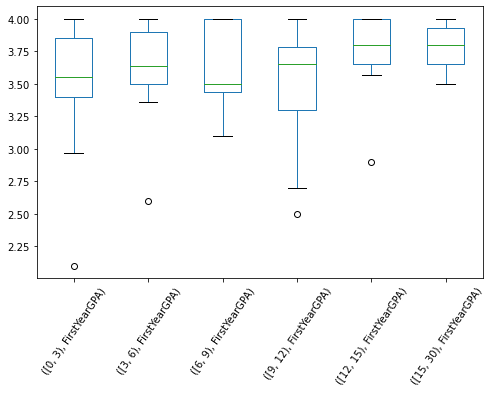

In [2]:
fyGPA_courses = data.iloc[:,[5,7,8]].dropna().replace("None", "0")

df = pd.DataFrame()
df["SumCourses"] = fyGPA_courses.iloc[:,1:3].astype(int).sum(axis=1)
df["SumCourses"] = pd.cut(df["SumCourses"],bins=[0,3,6,9,12,15,30],right=False)

df["FirstYearGPA"] = fyGPA_courses.iloc[:,0].astype(float)

df.groupby("SumCourses").boxplot(subplots=False,rot=55,figsize=(8,5),grid=False)

<AxesSubplot:>

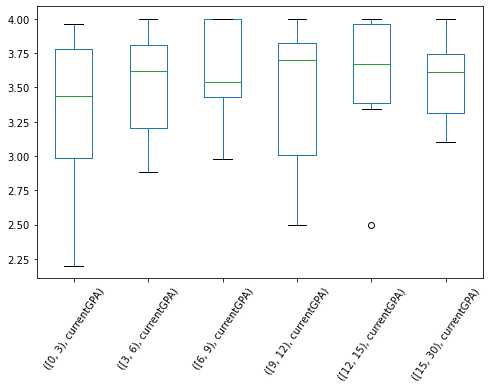

In [3]:
curGPA_courses = data.iloc[:,[3,7,8]].dropna().replace("None", "0")

df = pd.DataFrame()
df["SumCourses"] = curGPA_courses.iloc[:,1:3].astype(int).sum(axis=1)
df["SumCourses"] = pd.cut(df["SumCourses"],bins=[0,3,6,9,12,15,30],right=False)

df["currentGPA"] = curGPA_courses.iloc[:,0].astype(float)

df.groupby("SumCourses").boxplot(subplots=False,rot=55,figsize=(8,5),grid=False)

The results from our survey show that roughly 80% of all responses came from men. While not inherently a problem in the survey or questions, this distribution may not accurately represent the distribution in the classes the survey was sent out to. Another problem that is introduced is that we cannot come to an accurate conclusion on whether or not gender has an impact on GPA simply due to the sheer difference in response numbers. A similar problem occurs for advanced courses, the disparity in resonse volume may lead to inaccurate results. Ultimately our survey is most accurate for men in the classes that it was sent out to, and we cannot say whether respondant gender has an effect on academic performance in college or the number of advanced courses that were taken in high school.

<AxesSubplot:ylabel='None'>

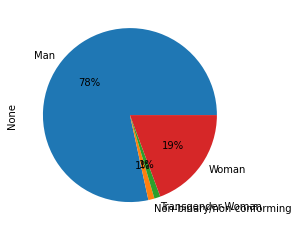

In [4]:
data.groupby("What gender do you identify as?").size().plot.pie(autopct='%.0f%%')

<AxesSubplot:xlabel='What was your approximate GPA for your first year at UCR?'>

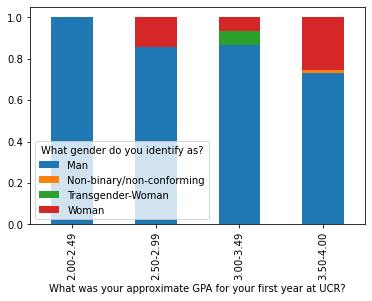

In [5]:
yearOneGPA = data.iloc[:,5].astype(float)

gender = data.iloc[:, 1].dropna()
yearOneGPA = pd.cut(yearOneGPA,bins=[0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.1],labels=["0.00-0.49","0.50-0.99","1.00-1.49","1.50-1.99","2.00-2.49","2.50-2.99","3.00-3.49","3.50-4.00"],right=False) # bin the GPA's

df = pd.crosstab(gender, yearOneGPA)

gpa_counts = df.sum(axis= 0)
df = df.divide(gpa_counts, axis=1)

(df.T).plot.bar(stacked= True)

display number of hours spent studying as a function of number of advanced classes taken.

<function matplotlib.pyplot.show(close=None, block=None)>

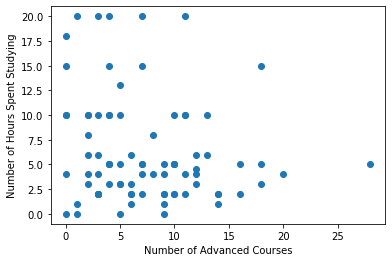

In [6]:
study_Courses = data.iloc[:, [7, 8, 12]].dropna()

df = pd.DataFrame()
df["Study Hours"] = study_Courses.iloc[:, 2].str.replace(" hours", "").str.replace("-", ".").astype(float)
df["Advanced Courses"]= study_Courses.iloc[:, [0, 1]].replace("None", "0").astype(int).sum(axis= 1)

plt.scatter(df.iloc[:, 1], df.iloc[:, 0])
plt.xlabel("Number of Advanced Courses")
plt.ylabel("Number of Hours Spent Studying")
plt.show

display hours spent studying as a function of first year GPA.

<function matplotlib.pyplot.show(close=None, block=None)>

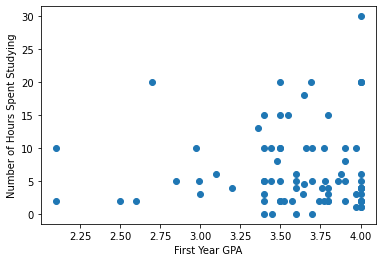

In [7]:
study_gpa= data.iloc[:, [5, 12]].dropna()

df = pd.DataFrame()
df["Study Hours"] = study_gpa.iloc[:, 1].str.replace(" hours", "").str.replace("-", ".").astype(float)
df["First Year GPA"] = study_gpa.iloc[:, 0]

plt.scatter(df.iloc[:, 1], df.iloc[:, 0])
plt.xlabel("First Year GPA")
plt.ylabel("Number of Hours Spent Studying")
plt.show

Pearson correlation of stem advanced classes, social studies/arts advanced classes, importance of education, enjoyment of education

In [ ]:
heatmap_data  = data.iloc[:, [7, 8, 10, 11]].dropna().replace("None", "0")
pd.set_option('display.max_rows', None)
mapping = {'' : 0, 'AP Calculus, AP Environmental Science' : 2}

heatmap_data.replace({'' : mapping, 'AP Calculus, AP Environmental Science' : mapping})

heatmap_data = heatmap_data.astype('int')
heatmap_data["Total highschool advance couses taken"] = heatmap_data.iloc[:, 0:2].sum(axis = 1)

#display(heatmap_data)

r = heatmap_data.corr(method = 'pearson')
display(r)

Heat map of the correlation between importance of education, enjoyment of education, and # of advanced classes

In [ ]:
import seaborn as sns
# parameter "center" indicate the value at which to center the colormap when plotting divergant data.
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(r, center= 0, cmap = "coolwarm",annot= True)
plt.show()

Interesting correlations of all data in the dataset (very few positive correlations)

<AxesSubplot:>

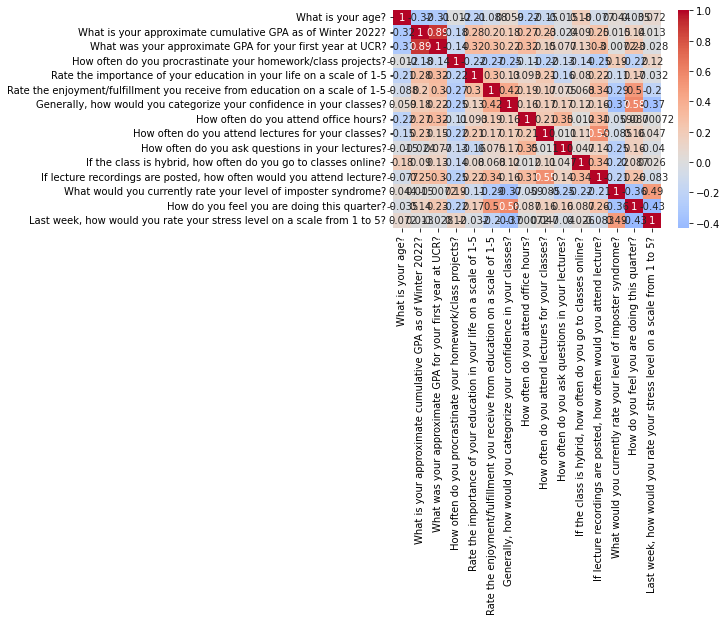

In [8]:
import seaborn as sns
sns.heatmap(data.corr(), center=0, cmap = "coolwarm", annot=True)

Histogram of cumulative GPAs (as of winter 2022)

<AxesSubplot:>

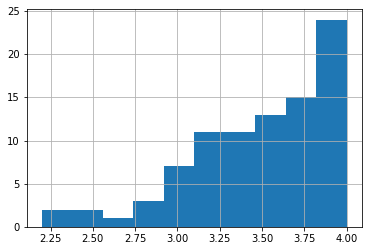

In [9]:
data.iloc[:,3].hist()

Stacked bar plot (not proportions) of how important people find education and how often they procrastinate.

<AxesSubplot:xlabel='Rate the importance of your education in your life on a scale of 1-5'>

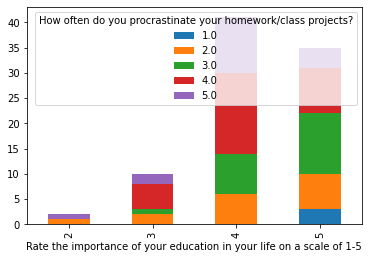

In [10]:
procrastinate = data.iloc[:,9]
edu_importance = data.iloc[:,10]
temp = pd.crosstab(edu_importance, procrastinate)
temp.plot.bar(stacked=True)

**Visualization Ideas**

Scatter plot:
	GPA vs # courses taken,
	study hours vs # courses,
	study hours to GPA,

Histogram:

Pie chart:
	Gender?

Bar chart:
	GPA distribution,
	Advanced courses distribution,

Box Plot:
	Distribution of first quarter GPA and overall GPA, for each bin of # courses?

# Hypothesis

The main question we want to answer for this mini project is whether or not taking advanced courses in high school prepares you for college or makes you more successful in college. Therefore, our main hypothesis is:

Taking advanced courses in high school leads to better academic performance in college.

In order to test this hypothesis, we will perform a correlation analysis on the total number of advanced courses taken in high school vs. the first year college GPA. After that, we will perform a chi-squared analysis on the same data. These two statistics should tell us whether there is statistical significance in the relationship between these two variables.

Lets start with the correlation analysis:

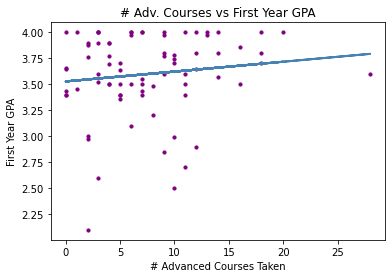

Correlation: 0.1301


In [11]:
gpa_courses = data.iloc[:,[5,7,8]].dropna().replace("None", "0") # get first year GPA and advanced courses

sumCourses = gpa_courses.iloc[:,1:3].astype(int).sum(axis=1) # sum the two types of advanced courses
yearOneGPA = gpa_courses.iloc[:,0].astype(float) # get the GPA's

a, b = np.polyfit(sumCourses, yearOneGPA, 1)

corr, extra = pearsonr(sumCourses, yearOneGPA)

plt.plot(sumCourses, a*sumCourses+b, color='steelblue', linewidth=2)
plt.scatter(sumCourses, yearOneGPA, s=10, c="purple")
plt.title("# Adv. Courses vs First Year GPA")
plt.xlabel("# Advanced Courses Taken")
plt.ylabel("First Year GPA")
plt.show()

print("Correlation:",round(corr,4))

As we can see, there is a weak positive correlation when it come to first year GPA and the number of advanced courses taken in high school. We expected this correlation to be higher, but it sufficies to say that these two variables are probably not independent. However, we can perform a statiscal test to see just how dependent first year college GPA is on the number of advanced courses taken in high school.

Now, we will look at the chi-squared test. We first seperate the data into useful buckets, then generate the chi-squared table. From there, we can use Python to find the statistic and p-value.

The null hypothesis for this test is: Taking advanced courses in high school has no effect on first year college GPA.

In [12]:
sumCourses = pd.cut(sumCourses,bins=[0,3,6,9,12,15,30],labels=["0-2","3-5","6-8","9-11","12-14","15+"],right=False) # bin the sums

yearOneGPA = pd.cut(yearOneGPA,bins=[0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.1],labels=["0.00-0.49","0.50-0.99","1.00-1.49","1.50-1.99","2.00-2.49","2.50-2.99","3.00-3.49","3.50-4.00"],right=False) # bin the GPA's

table = pd.crosstab(sumCourses, yearOneGPA, rownames=["# Adv. Courses"], colnames=["First Year GPA"]) # create the chi-squared table
c, p, dof, expected = chi2_contingency(table) # perform chi-squared

# Show results
display(table)
print("Chi-Squared Statistic:", round(c, 2))
print("p-value:", round(p, 4))

First Year GPA,2.00-2.49,2.50-2.99,3.00-3.49,3.50-4.00
# Adv. Courses,,,,
0-2,1,1,5,7
3-5,0,1,3,15
6-8,0,0,5,8
9-11,0,4,1,11
12-14,0,1,0,8
15+,0,0,0,7


Chi-Squared Statistic: 23.4
p-value: 0.076


Here is our chi-squared table. One interesting thing to note is that the table takes on a sort of triangluar shape, where the higher the number of classes taken the more 0's you see for lower GPA buckets. This indicates, again, that first year college GPA may be dependent on the number of advanced classes taken in high school.

As you can see, the chi-squared statsitic is 23.4. With the number of degrees of freedom in this table (15), we get a p value of 0.076. These means that if we reject the null hypothesis, we have a 7.6% chance of being incorrect. Those are pretty low odds, so we will conclude from our research that taking more advanced courses in high school will improve one's chances of doing well, academically, in college.